Info k datam:

"Residence permit means any authorisation valid for at least 3 months issued by the authorities of a Member State allowing a third country national to stay legally on its territory. All valid permits on 31st December (end of the year). This data include statistics on all valid permits at the end of reference period, therefore including first permits, change of status or reasons to stay and renewed permits."

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
permits = pd.read_csv("../Data/Immigration/permits.csv")
permits.drop(columns = ['DATAFLOW', 'LAST UPDATE', 'freq', 'duration', 'unit', 'OBS_FLAG', 'CONF_STATUS', 'citizen' ], inplace = True)
permits.rename(columns = {'OBS_VALUE':'count', 'TIME_PERIOD':'year'}, inplace = True)
countries = set(permits['geo'])
permits = permits.pivot_table(index=["geo", "year"],
                         columns="reason",
                         values="count")
# data for remunerated activities is missing, but I will compute it from the others and total:
permits['Work reasons'] = permits['Total'] - permits['Education reasons'] - permits['Family reasons'] - permits['Other reason']
display(permits)

reason               Education reasons  Family reasons  Other reason  \
geo            year                                                    
Austria        2012            16955.0         75054.0      395161.0   
               2013            17960.0         77124.0      348981.0   
               2014            19538.0         72018.0      329813.0   
               2015            22474.0         76301.0      347497.0   
               2016            22497.0         80833.0      360987.0   
...                                ...             ...           ...   
United Kingdom 2014           513294.0        503225.0      121073.0   
               2015           517061.0        518268.0      135773.0   
               2016           507110.0        519618.0      107824.0   
               2017           523766.0        545778.0      102017.0   
               2018           467977.0        616125.0      110829.0   

reason                   Total  Work reasons  
geo            year                           
Austria        2012   493171.0        6001.0  
               2013   450410.0        6345.0  
               2014   427923.0        6554.0  
               2015   453069.0        6797.0  
               2016   471054.0        6737.0  
...                        ...           ...  
United Kingdom 2014  1509007.0      371415.0  
               2015  1544879.0      373777.0  
               2016  1504018.0      369466.0  
               2017  1533551.0      361990.0  
               2018  1577559.0      382628.0  

[371 rows x 5 columns]

reason         Education reasons  Family reasons  Other reason     Total  \
geo      year                                                              
Slovakia 2012             1039.0          8991.0        8061.0   24832.0   
         2013             1556.0          9056.0        6387.0   24864.0   
         2014             2294.0         10276.0        7656.0   28611.0   
         2015             3038.0         12302.0        8746.0   34113.0   
         2016             3943.0         14700.0        8754.0   39906.0   
         2017             4663.0         16198.0        9780.0   48119.0   
         2018             6072.0         17993.0        9757.0   62365.0   
         2019             7759.0         20691.0       10480.0   82156.0   
         2020             8730.0         23488.0       11665.0   90350.0   
         2021             9755.0         25904.0       11686.0  107684.0   
         2022            11342.0         28069.0       11465.0  120625.0   
         2023            13431.0         29992.0       11228.0  132372.0   

reason         Work reasons  
geo      year                
Slovakia 2012        6741.0  
         2013        7865.0  
         2014        8385.0  
         2015       10027.0  
         2016       12509.0  
         2017       17478.0  
         2018       28543.0  
         2019       43226.0  
         2020       46467.0  
         2021       60339.0  
         2022       69749.0  
         2023       77721.0

<Axes: title={'center': 'Permits in Slovakia by reason'}, xlabel='Year', ylabel='Count'>

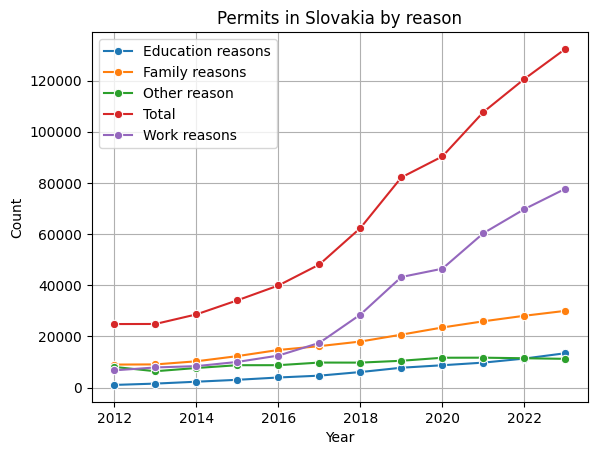

In [ ]:
def draw_permits(country):
    permits_in_country = permits.query('geo == @country')
    display(permits_in_country)

    for column in permits_in_country.columns:
        plot = sns.lineplot(data = permits_in_country, x = 'year', y = column, label=column, marker='o')

    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.title(f"Permits in {country} by reason")
    plt.legend()
    plt.grid(True)
    return plot

draw_permits('Slovakia')